In [1]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
s_d=pd.read_csv("./Ops Case Study Dataset - Sample DB Data (2).csv")


In [10]:
s_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient Name     6482 non-null   object
 1   Provider Name    6482 non-null   object
 2   from_date_range  6482 non-null   object
 3   cpt_codes        6482 non-null   object
dtypes: object(4)
memory usage: 202.7+ KB


In [6]:
s_d.isnull().sum()

Patient Name       0
Provider Name      0
from_date_range    0
cpt_codes          0
dtype: int64

In [11]:
e_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25956 entries, 0 to 25955
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient Name     25956 non-null  object
 1   Provider Name    25954 non-null  object
 2   Date of Service  25954 non-null  object
 3   CPT Code         25954 non-null  object
dtypes: object(4)
memory usage: 811.3+ KB


In [14]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
%pip install seaborn
%pip install mplcyberpunk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\efte2\AppData\Local\Temp\ipykernel_28032\162323718.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cpt_counts.index, y=cpt_counts.values, palette="coolwarm")


NameError: name 'mblcyberpunk' is not defined

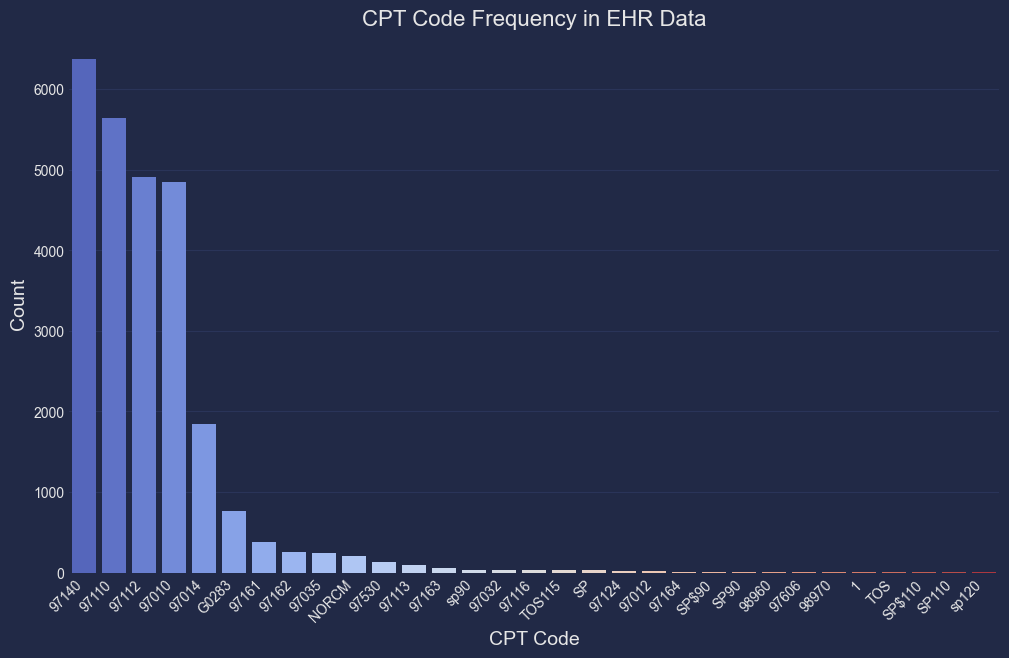

In [28]:
import seaborn as sns
import mplcyberpunk

# Set cyberpunk style
plt.style.use("cyberpunk")

# Create a barplot using seaborn
plt.figure(figsize=(12,7))
sns.barplot(x=cpt_counts.index, y=cpt_counts.values, palette="coolwarm")
plt.xlabel('CPT Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('CPT Code Frequency in EHR Data', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add cyberpunk glow effect
mblcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()

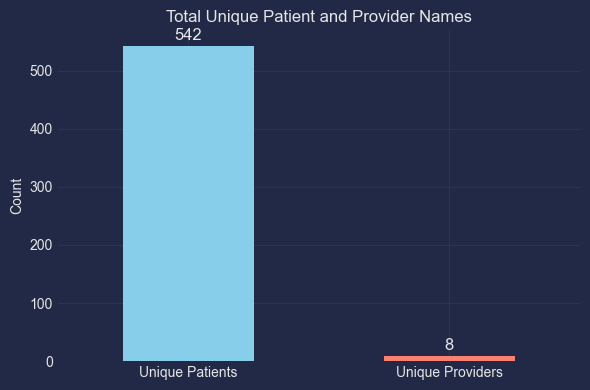

In [29]:
# Plot bar chart with y-tick labels and value annotation above each bar
plt.figure(figsize=(6,4))
ax = counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Total Unique Patient and Provider Names')
plt.xticks(rotation=0)
plt.tight_layout()

# Annotate each bar with its value
for i, v in enumerate(counts.values):
    ax.text(i, v + max(counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

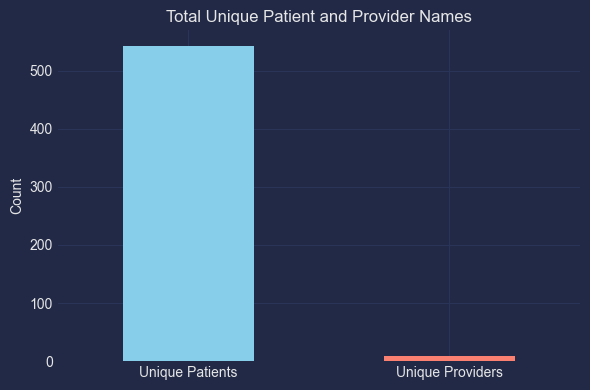

In [23]:
# Count unique patient names and provider names
unique_patient_count = e_d['Patient Name'].nunique()
unique_provider_count = e_d['Provider Name'].nunique()

# Prepare data for bar plot
counts = pd.Series([unique_patient_count, unique_provider_count], index=['Unique Patients', 'Unique Providers'])

# Plot bar chart
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Total Unique Patient and Provider Names')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

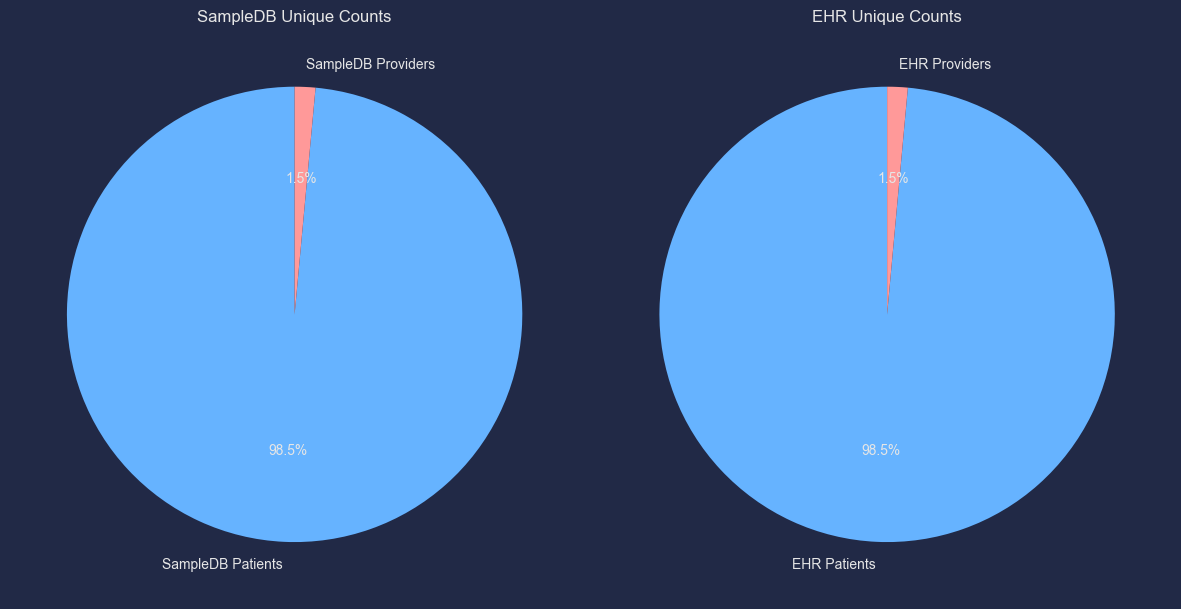

In [32]:
# Prepare data for pie charts
sampledb_sizes = [s_d['Patient Name'].nunique(), s_d['Provider Name'].nunique()]
ehr_sizes = [e_d['Patient Name'].nunique(), e_d['Provider Name'].nunique()]
sampledb_labels = ['SampleDB Patients', 'SampleDB Providers']
ehr_labels = ['EHR Patients', 'EHR Providers']
colors = ['#66b3ff', '#ff9999']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for SampleDB
axes[0].pie(sampledb_sizes, labels=sampledb_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('SampleDB Unique Counts')

# Pie chart for EHR
axes[1].pie(ehr_sizes, labels=ehr_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('EHR Unique Counts')

plt.tight_layout()
plt.show()

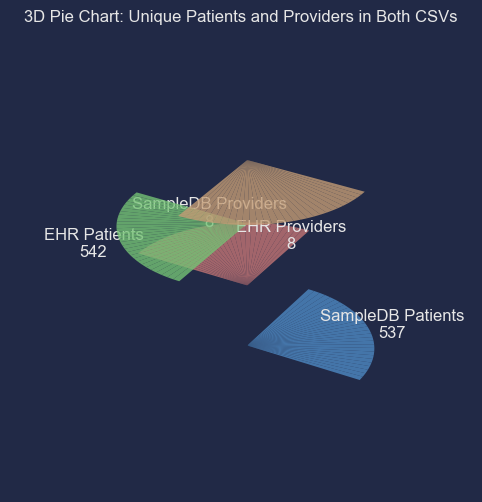

In [ ]:
gap = 0.2  # Extra space between slices

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(sizes)):
    x = [0] + np.cos(np.linspace(theta[i], theta[i+1], 30)).tolist()
    y = [0] + np.sin(np.linspace(theta[i], theta[i+1], 30)).tolist()
    z = np.full_like(x, i * (width + gap))  # Add gap between slices
    ax.plot_trisurf(x, y, z, color=colors[i], alpha=0.8, linewidth=0)

# Add labels with offset to avoid overlap
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (theta[i] + theta[i+1]) / 2
    ax.text(np.cos(angle)*1.2, np.sin(angle)*1.2, i*(width + gap), f"{label}\n{size}", ha='center', va='center', fontsize=12)

ax.set_axis_off()
plt.title('3D Pie Chart: Unique Patients and Providers in Both CSVs')
plt.show()

TypeError: index type not supported

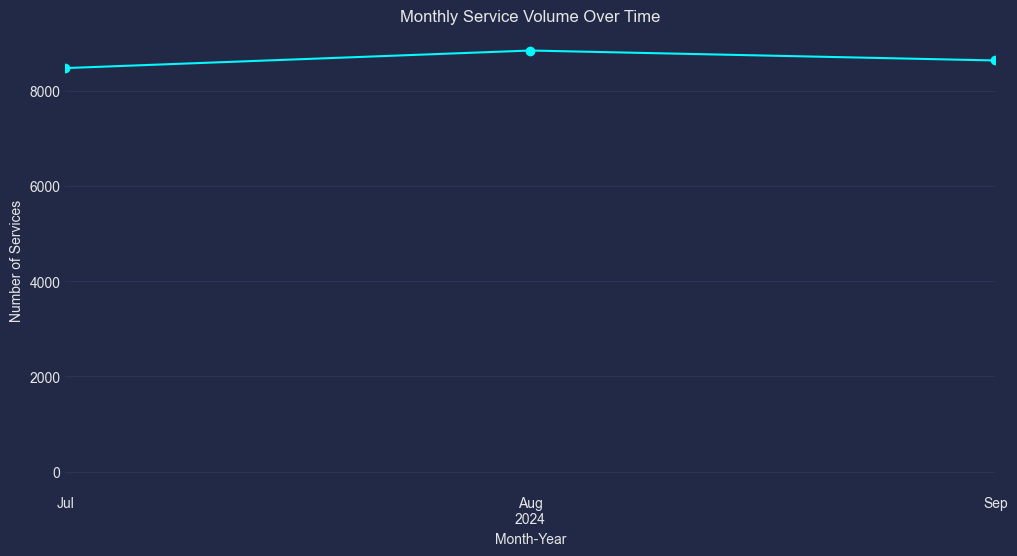

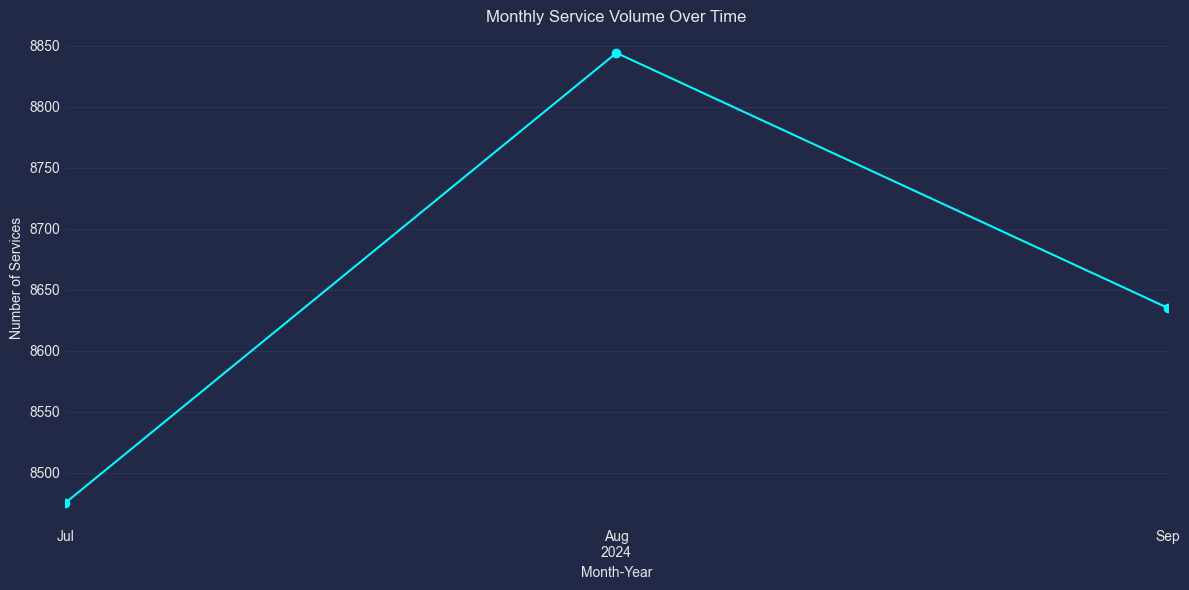

In [26]:
# Convert 'Date of Service' to datetime
e_d['Date of Service'] = pd.to_datetime(e_d['Date of Service'], errors='coerce')

# Group by month and year, count number of services
monthly_counts = e_d.groupby(e_d['Date of Service'].dt.to_period('M')).size()

# Plot forecast type graph (line plot)
plt.figure(figsize=(12,6))
monthly_counts.plot(kind='line', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Number of Services')
plt.title('Monthly Service Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

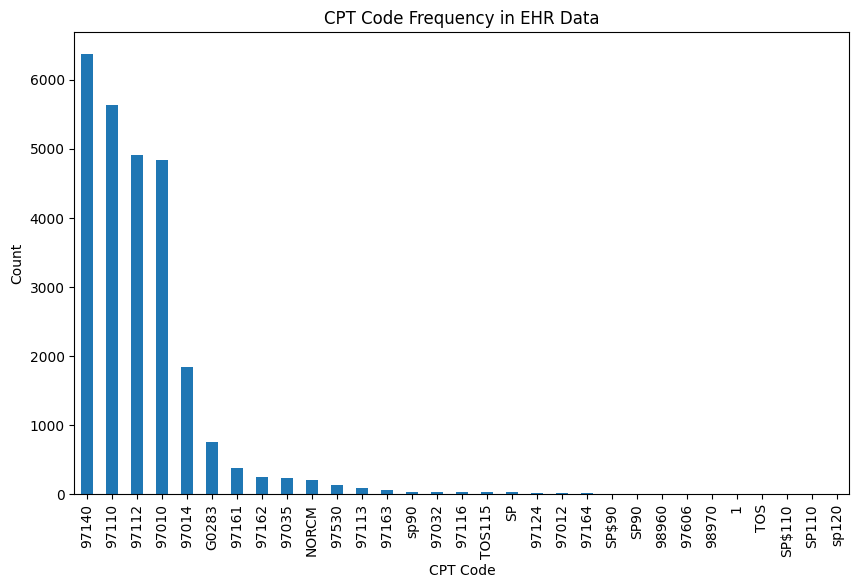

In [21]:
# Count occurrences of each CPT Code
cpt_counts = e_d['CPT Code'].value_counts()

# Plot bar chart of CPT Code counts
cpt_counts.plot(kind='bar', figsize=(10,6))
plt.xlabel('CPT Code')
plt.ylabel('Count')
plt.title('CPT Code Frequency in EHR Data')
plt.show()

In [8]:
e_d=pd.read_csv("./Ops Case Study Dataset - Sample EHR Data (2).csv")

In [9]:
e_d.isnull().sum()

Patient Name       0
Provider Name      2
Date of Service    2
CPT Code           2
dtype: int64

In [7]:
e_d.isnull().sum()

NameError: name 'e_d' is not defined